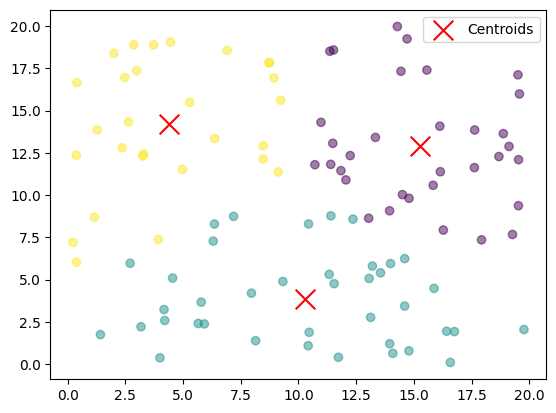

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from K_Means import KMeans
from Kmeans_Plus_Plus import KMeansPlusPlus

def euclidean_distance(a, b):
    """计算欧几里得距离"""
    return np.sqrt(np.sum((a - b) ** 2))

def kmeans_plus_plus_init(data, k):
    """K-Means++ 初始化簇中心"""
    np.random.seed(42)  # 设定随机种子
    centroids = [data[np.random.randint(0, len(data))]]  # 随机选择第一个点

    for _ in range(1, k):
        distances = np.array([min(euclidean_distance(x, c) for c in centroids) for x in data])
        probabilities = distances**2 / np.sum(distances**2)
        next_centroid = data[np.random.choice(len(data), p=probabilities)]
        centroids.append(next_centroid)

    return np.array(centroids)

def kmeans(data, k, max_iters=100, tol=1e-4):
    """K-Means++ 版本"""
    centroids = kmeans_plus_plus_init(data, k)  # 使用 K-Means++ 初始化

    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)

        # 计算新簇中心
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] 
                                  for i, cluster in enumerate(clusters)])

        # 判断收敛
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    labels = [np.argmin([euclidean_distance(point, centroid) for centroid in centroids]) for point in data]
    return centroids, labels

# 生成数据
np.random.seed(0)
data = np.random.rand(100, 2) * 20

# 运行 K-Means++
centroids, labels = kmeans(data, k=3)

# 可视化结果
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.legend()
plt.show()